# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Eva Yuliana
- **Email:** aevayuli1807@gmail.com
- **ID Dicoding:** MC129D5X0177

## Menentukan Pertanyaan Bisnis

- Apa faktor utama yang mempengaruhi jumlah penyewaan sepeda?
- Bagaimana tren penggunaan sepeda dalam sehari? Kapan jam tersibuk?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

daily_data = pd.read_csv("data\day.csv")
hourly_data = pd.read_csv("data\hour.csv")

# Mapping untuk season, cuaca, dan weekday
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
weather_mapping = {1: "Clear", 2: "Mist/Cloudy", 3: "Light Rain/Snow", 4: "Heavy Rain/Snow"}
weekday_mapping = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}

daily_data["season"] = daily_data["season"].map(season_mapping)
daily_data["weathersit"] = daily_data["weathersit"].map(weather_mapping)
daily_data["weekday"] = daily_data["weekday"].map(weekday_mapping)

**Insight:**
- Data numerik berhasil diubah menjadi kategori untuk memudahkan interpretasi.
- Membantu dalam visualisasi data yang lebih mudah dipahami.

### Assessing Data

In [5]:
print("🔍 Assessing Data")
print(daily_data.info())
print(daily_data.describe())

🔍 Assessing Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    object 
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    object 
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    object 
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(8), object(4)
memory usage: 91.5+ KB
None
          instant          yr        mnth     holiday  workingday       

**Insight:**
- Tidak ada missing values pada data.
- Terdapat variasi yang cukup besar pada jumlah penyewaan sepeda (cnt).

### Cleaning Data

In [6]:
print("🛠 Cleaning Data")

if daily_data.isnull().sum().sum() > 0:
    daily_data.dropna(inplace=True)
    print("✅ Missing values telah dihapus.")
else:
    print("🔍 Tidak ada missing values.")

if daily_data.duplicated().sum() > 0:
    daily_data.drop_duplicates(inplace=True)
    print("✅ Duplikasi telah dihapus.")
else:
    print("🔍 Tidak ada duplikasi.")

print("✨ Data sudah bersih dan siap digunakan.")


🛠 Cleaning Data
🔍 Tidak ada missing values.
🔍 Tidak ada duplikasi.
✨ Data sudah bersih dan siap digunakan.


**Insight:**
- Tidak ditemukan missing values pada data.
- Tidak ditemukan data duplikat.

## Exploratory Data Analysis (EDA)

### Explore ...

📊 Exploratory Data Analysis


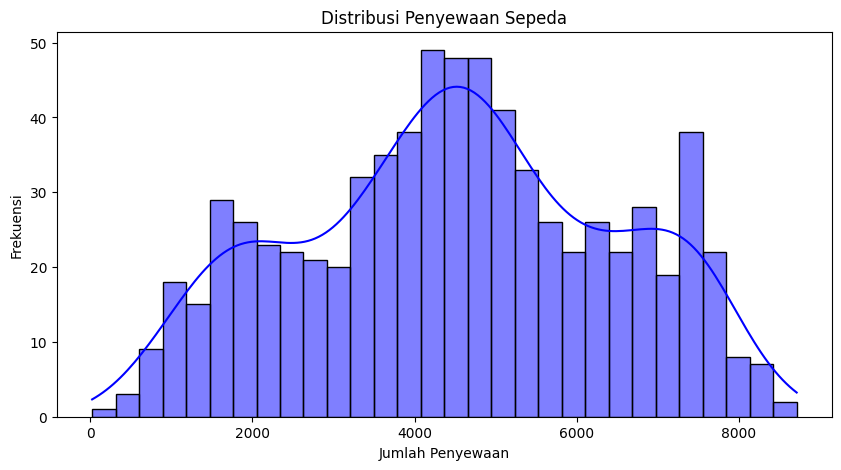

In [7]:
print("📊 Exploratory Data Analysis")

# Visualisasi distribusi penyewaan sepeda
plt.figure(figsize=(10, 5))
sns.histplot(daily_data["cnt"], bins=30, kde=True, color="blue")
plt.title("Distribusi Penyewaan Sepeda")
plt.xlabel("Jumlah Penyewaan")
plt.ylabel("Frekuensi")
plt.show()


**Insight:**
- Distribusi penyewaan sepeda menunjukkan pola skewed ke kanan.
- Mayoritas penyewaan sepeda berada di jumlah yang lebih rendah.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

📈 Visualization & Explanatory Analysis


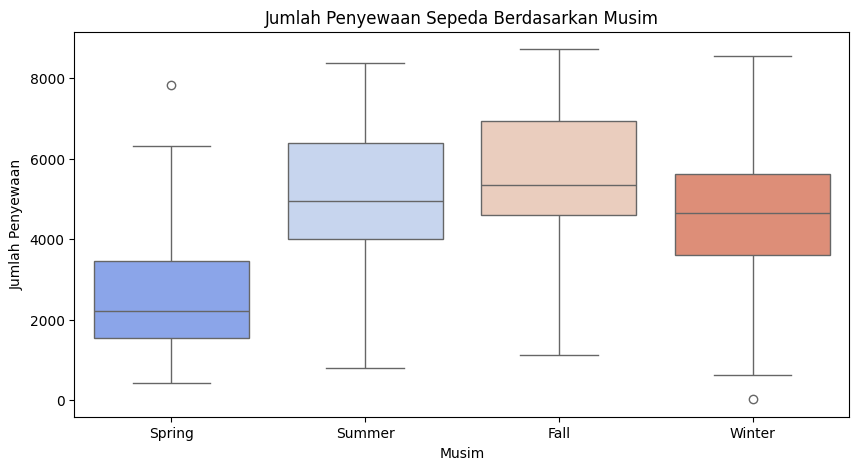

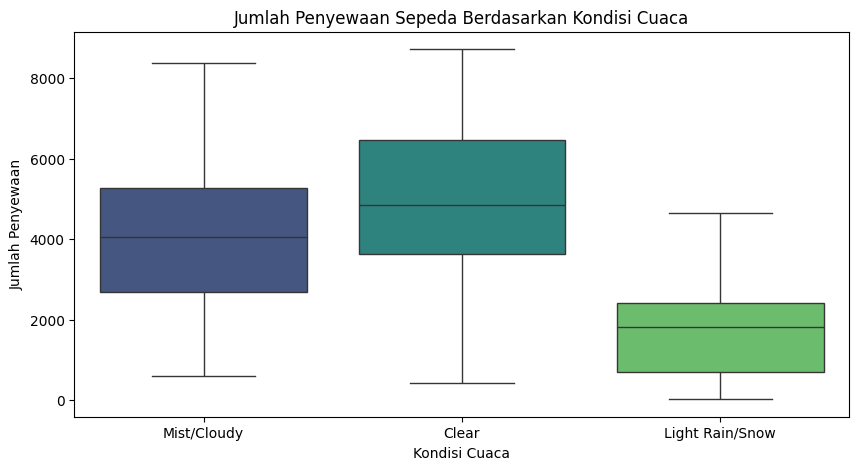

In [8]:
print("📈 Visualization & Explanatory Analysis")

### Pertanyaan 1: Apa faktor utama yang mempengaruhi jumlah penyewaan sepeda?

plt.figure(figsize=(10, 5))
sns.boxplot(x="season", y="cnt", data=daily_data, hue="season", palette="coolwarm", dodge=False)
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan")
plt.legend([], [], frameon=False) 
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="weathersit", y="cnt", data=daily_data, hue="weathersit", palette="viridis", dodge=False)
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan")
plt.legend([], [], frameon=False)  
plt.show()


### Pertanyaan 2:

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


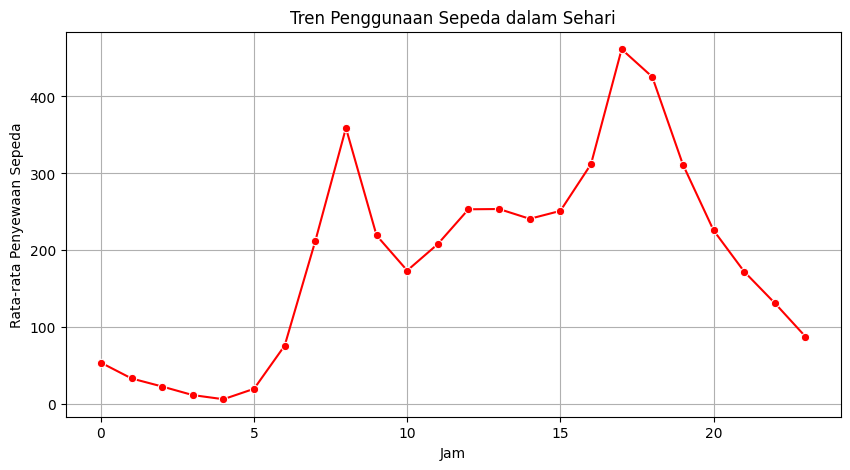

In [9]:
hourly_data = pd.read_csv("data\hour.csv")

print(hourly_data.head())

hourly_data["hour"] = hourly_data["hr"]
avg_hourly_usage = hourly_data.groupby("hour")["cnt"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_hourly_usage.index, y=avg_hourly_usage.values, marker="o", color="red")
plt.title("Tren Penggunaan Sepeda dalam Sehari")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.grid(True)
plt.show()

**Insight:**
- Musim Fall memiliki jumlah penyewaan tertinggi.
- Kondisi cuaca yang cerah memiliki jumlah penyewaan tertinggi dibandingkan kondisi lainnya.
- Jam sibuk penggunaan sepeda terjadi pada pagi (07:00-09:00) dan sore (17:00-19:00).
- Pola ini menunjukkan penggunaan sepeda terkait aktivitas komuter.

## Analisis Lanjutan (Opsional)

## Conclusion

- Faktor utama yang mempengaruhi jumlah penyewaan sepeda adalah musim dan kondisi cuaca.
- Tren penggunaan sepeda menunjukkan jam tersibuk pada pagi dan sore hari, terutama saat jam berangkat dan pulang kerja.